In [1]:
using Distributed
addprocs(44);

In [2]:
using PulseInputDDM, MAT
using Flatten

In [3]:
x_joint = Vector(undef, 3);
x_choice = Vector(undef, 3);

In [4]:
ratnames = ["B068","T034","T036","T063","T030", "T035","T011","B053", "T080","T103","E021"];
dt, n, cross = 1e-2, 53, false
data_path = joinpath(abspath(joinpath(pwd(), "..")), "data/by_session")
joint_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/joint");
choice_model_path = joinpath(abspath(joinpath(pwd(), "..")), "models/choice");

## PPC

In [5]:
region, delay = "PPC", 12
ratnum = 6:8
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_PPC, μ_rnt, μ_t = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, 
    delay=delay, dt=dt, filtSD=5, do_RBF=true);

In [6]:
file = joinpath(joint_model_path, "Fig2-PPC.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];  
x_joint[2] = xf;
joint_model_PPC = neural_choiceDDM(θneural_choice(xf, f), data_PPC, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((24,))
  n: Int64 53
  cross: Bool false


In [7]:
file = joinpath(choice_model_path, region*".mat")
x_choice[2] = read(matopen(file), "ML_params");

In [8]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_PPC...), :input_data));
choice_data_PPC = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_PPC...), :choice));
choice_model_PPC = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[2]), data=choice_data_PPC, n=n, cross=cross);

## ADS

In [9]:
region, delay = "ADS", 6
ratnum = 9:11
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_STR,μ_rnt, μ_t = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [10]:
file = joinpath(joint_model_path, "Fig2-ADS.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[3] = xf;
joint_model_STR = neural_choiceDDM(θneural_choice(xf, f), data_STR, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((27,))
  n: Int64 53
  cross: Bool false


In [11]:
file = joinpath(choice_model_path, region*".mat")
x_choice[3] = read(matopen(file), "ML_params");

In [12]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_STR...), :input_data));
choice_data_STR = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_STR...), :choice));
choice_model_STR = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[3]), data=choice_data_STR, n=n, cross=cross);

## FOF

In [13]:
region, delay = "FOF", 6
ratnum = 1:5
rat = ratnames[ratnum]
sessions = vcat(map(rat-> filter(x->occursin(rat,x), readdir(data_path)), rat)...);
data_FOF,μ_rnt, μ_t = load_neural_data(joinpath.(data_path, sessions), pcut=0.01, pad=20, delay=delay, dt=dt, filtSD=5,
    do_RBF=true);

In [14]:
file = joinpath(joint_model_path, "Fig2-FOF.mat")
f = string.(read(matopen(file), "f"))
ncells = collect(read(matopen(file), "ncells"))
nparams = read(matopen(file), "nparams")
xf = read(matopen(file), "ML_params")
borg = vcat(0,cumsum(ncells, dims=1))
nparams = [nparams[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]]
f = [f[i] for i in [borg[i-1]+1:borg[i] for i in 2:length(borg)]];   
x_joint[1] = xf;
joint_model_FOF = neural_choiceDDM(θneural_choice(xf, f), data_FOF, n, cross)

neural_choiceDDM{θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural_choice{θz{Float64},Float64,Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((46,))
  n: Int64 53
  cross: Bool false


In [15]:
file = joinpath(choice_model_path, region*".mat")
x_choice[1] = read(matopen(file), "ML_params");

In [16]:
choice_inputs = map(x-> PulseInputDDM.choiceinputs(clicks=x.clicks, binned_clicks=x.binned_clicks, 
    dt=dt, centered=false), getfield.(vcat(data_FOF...), :input_data));
choice_data_FOF = PulseInputDDM.choicedata.(choice_inputs, getfield.(vcat(data_FOF...), :choice));
choice_model_FOF = choiceDDM(θ = Flatten.reconstruct(θchoice(), x_choice[1]), data=choice_data_FOF, n=n, cross=cross);

### Compute difference in L and R clicks

In [17]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_FOF.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_FOF = cumsum.(-L .+ R);

In [18]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_PPC.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_PPC = cumsum.(-L .+ R);

In [19]:
output = map(x-> binLR(x.click_data.binned_clicks, x.click_data.clicks, x.click_data.dt), choice_model_STR.data);
L,R = getindex.(output,1), getindex.(output,2);
ΔLR_STR = cumsum.(-L .+ R);

## Forward pass and posteriors

In [20]:
import PulseInputDDM: forward, posterior

In [21]:
output = forward(joint_model_FOF);
output = vcat(output...);
joint_a_FOF = map(x-> x[1], output);
xc_joint_FOF = output[1][2];

In [22]:
output = forward(choice_model_FOF);
choice_a_FOF = map(x-> x[1], output);
xc_choice_FOF = output[1][2];

In [23]:
output = forward(joint_model_PPC);
output = vcat(output...);
joint_a_PPC = map(x-> x[1], output);
xc_joint_PPC = output[1][2];

In [24]:
output = forward(choice_model_PPC);
choice_a_PPC = map(x-> x[1], output);
xc_choice_PPC = output[1][2];

In [25]:
output = forward(joint_model_STR);
output = vcat(output...);
joint_a_STR = map(x-> x[1], output);
xc_joint_STR = output[1][2];

In [26]:
output = forward(choice_model_STR);
choice_a_STR = map(x-> x[1], output);
xc_choice_STR = output[1][2];

In [27]:
output = posterior(joint_model_FOF);
output = vcat(output...);
joint_post_FOF = map(x-> x[1] .* x[2], output);

In [28]:
output = posterior(joint_model_PPC);
output = vcat(output...);
joint_post_PPC = map(x-> x[1] .* x[2], output);

In [29]:
output = posterior(joint_model_STR);
output = vcat(output...);
joint_post_STR = map(x-> x[1] .* x[2], output);

In [30]:
output = posterior(choice_model_FOF);
choice_post_FOF = map(x-> x[1] .* x[2], output);

In [31]:
output = posterior(choice_model_STR);
choice_post_STR = map(x-> x[1] .* x[2], output);

In [32]:
output = posterior(choice_model_PPC);
choice_post_PPC = map(x-> x[1] .* x[2], output);

In [33]:
neural_model_FOF = neuralDDM(θ=θneural(θz=joint_model_FOF.θ.θz, θy=joint_model_FOF.θ.θy, f=joint_model_FOF.θ.f),
    data=joint_model_FOF.data, n=joint_model_FOF.n, cross=joint_model_FOF.cross);

output = posterior(neural_model_FOF);
output = vcat(output...);
neural_post_FOF = map(x-> x[1] .* x[2], output);

In [34]:
neural_model_PPC = neuralDDM(θ=θneural(θz=joint_model_PPC.θ.θz, θy=joint_model_PPC.θ.θy, f=joint_model_PPC.θ.f),
    data=joint_model_PPC.data, n=joint_model_PPC.n, cross=joint_model_PPC.cross);

output = posterior(neural_model_PPC);
output = vcat(output...);
neural_post_PPC = map(x-> x[1] .* x[2], output);

In [35]:
neural_model_STR = neuralDDM(θ=θneural(θz=joint_model_STR.θ.θz, θy=joint_model_STR.θ.θy, f=joint_model_STR.θ.f),
    data=joint_model_STR.data, n=joint_model_STR.n, cross=joint_model_STR.cross);

output = posterior(neural_model_STR);
output = vcat(output...);
neural_post_STR = map(x-> x[1] .* x[2], output);

#### Expected values

In [36]:
exp_PPC_choice = map(x-> x' * xc_choice_PPC, choice_post_PPC);
exp_PPC_joint = map(x-> x[:,33:end-8]' * xc_joint_PPC, joint_post_PPC);
exp_FOF_choice = map(x-> x' * xc_choice_FOF, choice_post_FOF);
exp_FOF_joint = map(x-> x[:,27:end-14]' * xc_joint_FOF, joint_post_FOF);
exp_STR_choice = map(x-> x' * xc_choice_STR, choice_post_STR);
exp_STR_joint = map(x-> x[:,27:end-14]' * xc_joint_STR, joint_post_STR);

exp_PPC_neural = map(x-> x[:,33:end-8]' * xc_joint_PPC, neural_post_PPC);
exp_FOF_neural = map(x-> x[:,27:end-14]' * xc_joint_FOF, neural_post_FOF);
exp_STR_neural = map(x-> x[:,27:end-14]' * xc_joint_STR, neural_post_STR);

exp_PPC_choice_for = map(x-> x' * xc_choice_PPC, choice_a_PPC);
exp_PPC_joint_for = map(x-> x[:,33:end-8]' * xc_joint_PPC, joint_a_PPC);
exp_FOF_choice_for = map(x-> x' * xc_choice_FOF, choice_a_FOF);
exp_FOF_joint_for = map(x-> x[:,27:end-14]' * xc_joint_FOF, joint_a_FOF);
exp_STR_choice_for = map(x-> x' * xc_choice_STR, choice_a_STR);
exp_STR_joint_for = map(x-> x[:,27:end-14]' * xc_joint_STR, joint_a_STR);

In [37]:
using Colors, PyPlot
mycolors = ["red", "#1822A0", "#A01892"]

3-element Array{String,1}:
 "red"
 "#1822A0"
 "#A01892"

In [38]:
idxs_FOF = sortperm(vcat(choice_likelihood(joint_model_FOF)...) .- vcat(likelihood(choice_model_FOF)...));
idxs_PPC = sortperm(vcat(choice_likelihood(joint_model_PPC)...) .- vcat(likelihood(choice_model_PPC)...));
idxs_STR = sortperm(vcat(choice_likelihood(joint_model_STR)...) .- vcat(likelihood(choice_model_STR)...));

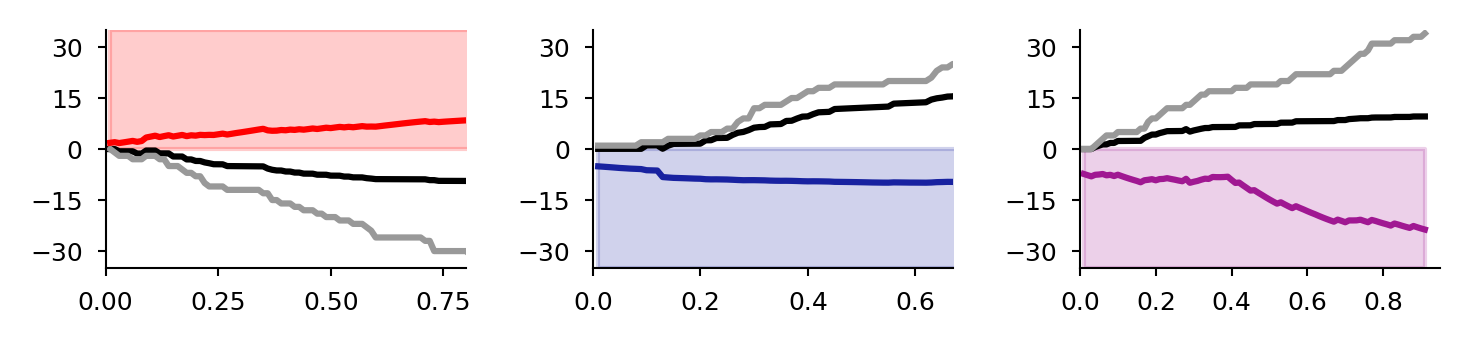

In [40]:
fig, ax = subplots(1, 3, figsize=(5, 1.25), dpi=300, frameon=true)

fs = 6
rc("xtick", labelsize=fs)
rc("ytick", labelsize=fs)

tri = idxs_FOF[end-3]
T = length(exp_FOF_joint_for[tri])

splt = 1
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_FOF_choice_for[tri]), color="black", label="choice")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    ΔLR_FOF[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_FOF_neural[tri]), color=mycolors[1], label="joint")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    35 * ones(T), zeros(T),
    alpha=0.2, color=mycolors[1]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].set_yticks(range(-30, stop=30, length=5))
ax[splt].set_ylim(-35, 35)
ax[splt].set_xticks(range(0., stop=0.75, length=4))
ax[splt].set_xlim(0, 0.8)

tri = idxs_PPC[end-1]
T = length(exp_PPC_joint_for[tri])
splt = 2
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_PPC_choice_for[tri]), color="black", label="choice")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    ΔLR_PPC[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_PPC_neural[tri]), color=mycolors[2], label="joint")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    -35 * ones(T), zeros(T),
    alpha=0.2, color=mycolors[2]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].set_yticks(range(-30, stop=30, length=5))
ax[splt].set_ylim(-35, 35)
ax[splt].set_xticks(range(0., stop=0.6, length=4))
ax[splt].set_xlim(0, 0.67)

tri = idxs_STR[end]
T = length(exp_STR_joint_for[tri])
splt = 3
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_STR_choice_for[tri]), color="black", label="choice")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    ΔLR_STR[tri], color=[0.6, 0.6, 0.6], label="ΔLR")
ax[splt].plot(range(dt, stop=dt*T, length=T), 
    (exp_STR_neural[tri]), color=mycolors[3], label="joint")
ax[splt].fill_between(range(dt, stop=dt*T, length=T),
    -35 * ones(T), zeros(T),
    alpha=0.2, color=mycolors[3]) 

ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].xaxis.set_ticks_position("bottom")
ax[splt].spines["right"].set_visible(false)
ax[splt].spines["top"].set_visible(false)
ax[splt].spines["bottom"].set_linewidth(0.5)
ax[splt].spines["left"].set_linewidth(0.5)
ax[splt].set_yticks(range(-30, stop=30, length=5))
ax[splt].set_ylim(-35, 35)
ax[splt].tick_params(width=0.5, length=2)
ax[splt].set_xticks(range(0., stop=0.8, length=5))
ax[splt].set_xlim(0, 0.95)

tight_layout()
PyPlot.savefig(joinpath(abspath(joinpath(pwd(), "..")), "figs/")*"Fig6B.pdf")